In [7]:
import random
import math
cycle_count = list()

In [8]:
def game_stats(x):
    #cycle_count = list()
    a_loss = list()
    b_loss = list()
    two_loss = list()
    three_loss = list()
    fourfivesix_loss = list()
    def another_game():
        player_A = 4   
        player_B = 4
        pot = 2
        turn = 0
        cycle = 0 
        game = True
        while game == True:
            turn += 1
            roll = random.randint(1,6)
            if roll == 2: 
                if pot == 0:
                    game = False
                    two_loss.append(1)
                    if (turn % 2) == 0:
                        b_loss.append(1)
                    else:
                        a_loss.append(1)
                    #print("Pot is empty!")
                elif (turn % 2) == 0:
                    player_B += pot
                    pot = 0
                    #print("Player B got the pot!") 
                else:
                    player_A += pot
                    pot = 0
                    #print("Player A got the pot!")

            elif roll == 3:
                if pot < 1:
                    game = False
                    three_loss.append(1)
                    if (turn % 2) == 0:
                        b_loss.append(1)
                    else:
                        a_loss.append(1)
                    
                    #print("Pot is empty!")
                elif (turn % 2) == 0:
                    player_B += math.floor(pot/2) #add floor function to round down
                    pot = math.ceil(pot/2)
                    #print("Player B got half the pot")
                else:
                    player_A += math.floor(pot/2)
                    pot = math.ceil(pot/2)
                    #print("Player A got half the pot")

            elif roll == 4 or roll == 5 or roll == 6:
                if (turn % 2) == 0 and player_B >= 1:
                    pot += 1
                    player_B -= 1
                    #print("Player B put one in the pot")
                elif (turn %2) == 1 and player_A >= 1:
                    pot += 1
                    player_A -= 1
                    #print("Player A put one in the pot")
                elif (turn %2) == 0 and player_B == 0: 
                    game = False
                    fourfivesix_loss.append(1)
                    b_loss.append(1)
                elif (turn % 2) == 1 and player_A == 0:
                    game = False
                    fourfivesix_loss.append(1)
                    a_loss.append(1)
                    
        #print("Game", i, "over after", turn, "turns.") #count statistics of what ends the game
        cycle = math.ceil(turn/2) 
        cycle_count.append(cycle)
    i = 1
    while i <= x:
        another_game()
        i += 1
    print("After", len(cycle_count), "games, the average game length was", sum(cycle_count)/len(cycle_count), "cycles.")
    #print(cycle_count)
    print(round(len(a_loss) / len(cycle_count)*100,1), "% of games were lost by player A.")
    print(round(len(b_loss) / len(cycle_count)*100,1), "% of games were lost by player B.")
    print(round(len(two_loss) / len(cycle_count)*100,1), "% of games were lost on a 2 roll.")
    print(round(len(three_loss) / len(cycle_count)*100,1), "% of games were lost on a 3 roll.")
    print(round(len(fourfivesix_loss) / len(cycle_count)*100,1), "% of games were lost on a 4, 5, or 6 roll.")
    


In [9]:
game_stats(1000000)

After 1000000 games, the average game length was 4.63121 cycles.
49.4 % of games were lost by player A.
50.6 % of games were lost by player B.
24.4 % of games were lost on a 2 roll.
24.3 % of games were lost on a 3 roll.
51.3 % of games were lost on a 4, 5, or 6 roll.


<AxesSubplot:ylabel='Frequency'>

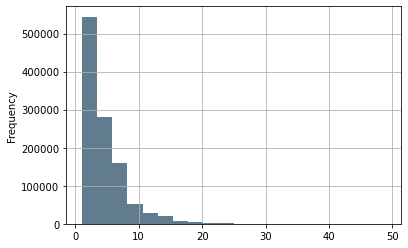

In [13]:
import pandas as pd
import matplotlib as plt
import numpy as np
cycle_count2 = np.array(cycle_count)
cycle_count3 = pd.Series(cycle_count)
    
cycle_count3.plot.hist(grid = True, bins= 20, rwidth = 2, color = '#607c8e')
#plt.title('Cycle count frequency')
#plt.xlabel('Number of Cycles a Game Lasts')
#plt.ylabel('Frequency')
#plt.grid(axis = 'y', alpha = 0.75)
#print(cycle_count2)

In [10]:
import random

def roll():
    return random.randint(1, 6)

def play_game():
    a_coins = 4
    b_coins = 4
    pot = 2
    cycles = 0
    
    while True:
        # A's turn
        if a_coins == 0:
            a_roll = roll()
            if a_roll == 1 or a_roll == 3:
                return cycles
            elif a_roll == 2:
                a_coins += pot
                pot = 0
            else:
                pot += 1
        else:
            a_roll = roll()
            if a_roll == 1:
                pass
            elif a_roll == 2:
                a_coins += pot
                pot = 0
            elif a_roll == 3:
                pot += a_coins // 2
                a_coins -= a_coins // 2
            else:
                a_coins -= 1
                pot += 1
        
        # B's turn
        if b_coins == 0:
            b_roll = roll()
            if b_roll == 1 or b_roll == 3:
                return cycles
            elif b_roll == 2:
                b_coins += pot
                pot = 0
            else:
                pot += 1
        else:
            b_roll = roll()
            if b_roll == 1:
                pass
            elif b_roll == 2:
                b_coins += pot
                pot = 0
            elif b_roll == 3:
                pot += b_coins // 2
                b_coins -= b_coins // 2
            else:
                b_coins -= 1
                pot += 1
        
        cycles += 1
        if a_coins == 0 and b_coins == 0:
            return cycles

num_trials = 10000
total_cycles = 0
for i in range(num_trials):
    total_cycles += play_game()
avg_cycles = total_cycles / num_trials
print("Average number of cycles:", avg_cycles)


Average number of cycles: 9.7089


In [12]:
import numpy as np
import random

def roll():
    return random.randint(1, 6)

# State space
states = [(a, b) for a in range(5) for b in range(5)]
pot = 2

# Transition matrix
P = np.zeros((len(states), len(states)))
for i, state in enumerate(states):
    a, b = state
    if a == 0:
        for j, next_state in enumerate(states):
            if next_state == (a, b):
                P[i, j] = 1
            elif next_state == (a, b+1):
                P[i, j] = 1/6
            else:
                P[i, j] = 1/6 if roll() in (4, 5, 6) else 0
    elif b == 0:
        for j, next_state in enumerate(states):
            if next_state == (a, b):
                P[i, j] = 1
            elif next_state == (a+1, b):
                P[i, j] = 1/6
            else:
                P[i, j] = 1/6 if roll() in (4, 5, 6) else 0
    else:
        for j, next_state in enumerate(states):
            if next_state == (a, b):
                P[i, j] = 1
            elif next_state == (a+1, b):
                P[i, j] = 1/6
            elif next_state == (a, b+1):
                P[i, j] = 1/6
            elif next_state == (a//2, b+a%2+pot):
                P[i, j] = 1/6 if a%2 == 1 else 0
            elif next_state == (a, b+pot):
                P[i, j] = 1/6 if a == 2 else 0
            else:
                P[i, j] = 1/6 if roll() in (4, 5, 6) else 0

# Solve the system of equations to find the expected number of cycles
v = np.linalg.solve(np.eye(len(states)) - P, np.ones(len(states)))
expected_cycles = np.sum(v)
print("Expected number of cycles:", expected_cycles)

#error - giving me a negative cycle run for some reason

Expected number of cycles: -9.321592109897853
